In [8]:
import jcopml

In [9]:
jcopml.__version__

'1.1.3'

In [2]:
import numpy as np
import pandas as pd

from jcopml.automl import AutoRegressor

In [3]:
def submit(model, filename="automl__v1.csv"):
    df_submit = pd.read_csv("data/test.csv", index_col="ID")
    df_submit['Chance_of_Admit'] = model.predict(df_submit)
    df_submit[['Chance_of_Admit']].to_csv(filename, index_label='ID')

# Import Data

In [4]:
df = pd.read_csv("data/train.csv", index_col="ID")
df.head()

GRE  TOEFL  University_Rating  SOP  LOR  CGPA  Research  Chance_of_Admit
ID                                                                           
250  321    111                  3  3.5  4.0  8.83         1             0.77
434  316    111                  4  4.0  5.0  8.54         0             0.71
20   303    102                  3  3.5  3.0  8.50         0             0.62
323  314    107                  2  2.5  4.0  8.27         0             0.72
333  308    106                  3  3.5  2.5  8.21         1             0.75

In [5]:
X = df.drop(columns="Chance_of_Admit")
y = df.Chance_of_Admit

# Training

In [6]:
model = AutoRegressor(["GRE", "TOEFL", "SOP", "LOR", "CGPA"], ["Research", "University_Rating"])

In [7]:
model.fit(X, y, cv=5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.3s


================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.0002800940363375679
algo__fit_intercept       | True
algo__l1_ratio            | 0.42340148070636974

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=False, n_neighbors=5)

=========== Score ===========
Train: 0.8221620417506085
Valid: 0.8057262747173498
Test : 0.8171517525635815


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   22.1s finished


# View Results

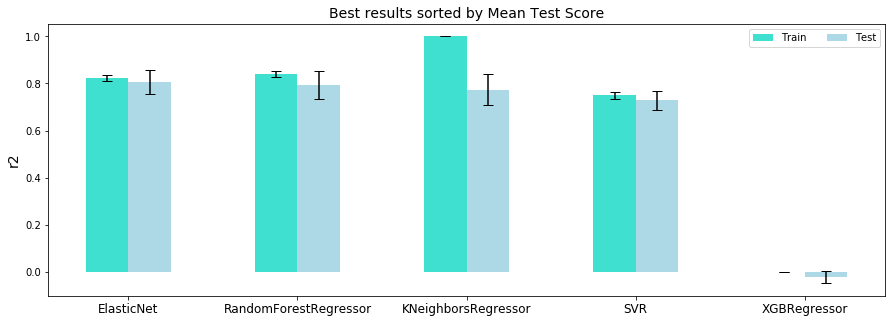

In [10]:
model.plot_results()

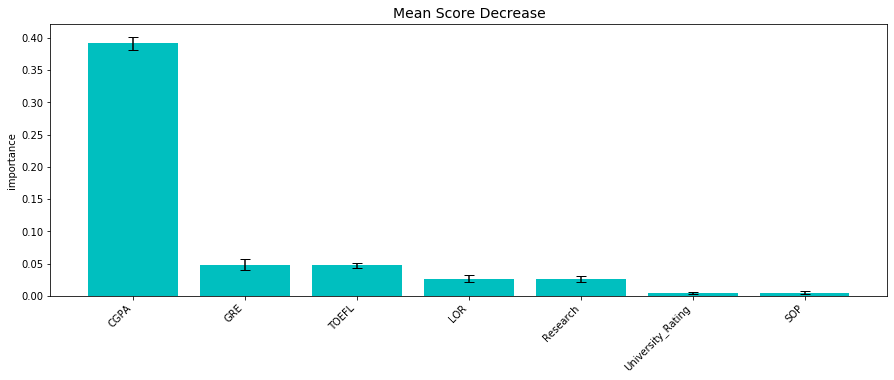

In [11]:
model.mean_score_decrease()

# Only ElasticNet

In [12]:
model.fit(X, y, cv=5, algo=["enet"], n_trial=100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.4s


================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.005117324605095934
algo__fit_intercept       | True
algo__l1_ratio            | 0.26678101427528506

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=False, strategy='mean')
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.8196672517878036
Valid: 0.8068290906827069
Test : 0.829677418202127


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.3s finished


In [13]:
submit(model, "automl__v1.csv")